In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

The major arteries in a T1 MRI image often have high signal (white when displaying in grayscale). Try loading the image using nibabel, to make an image object. 

In [5]:
img = nib.load('data/ds107_sub001_highres.nii')

Now get the image array data from the nibabel image object. 

In [12]:
img.shape

(256, 256, 192)

<font color="red"> **Note:** </font> instead of (256, 256, 3) 3 for RGB color channels, we have 192 slice to create a 3D image.

In [13]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 125.0
qoffset_y       : -144.0
qoffset_z       : -99.0
srow_x          : [ -1.   0.   0. 

Now get the image array data from the nibabel image object.

In [15]:
data = img.get_data()

Try plotting a few slices over the third dimension to see whether you can see the arteries.  For example, to plot the first slice over the third dimension, you might use:

`plt.imshow(data[:, :, 0], cmap='gray')`


where `data` is your image array data.

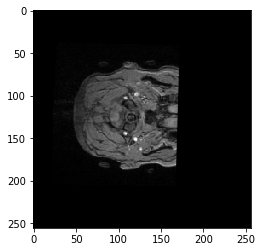

In [50]:
plt.imshow(data[:, :, 30], cmap='gray')
#plt.imshow(data[:, :, 38], cmap='gray')
#plt.imshow(data[:, :, 50], cmap='gray')

## Find Proper Threshold
Now try looking for a good threshold so that you pick up only the very high signal in the brain. A good place to start is to use plt.hist to get an idea of the spread of values within the volume and within the slice.

(array([9.076939e+06, 5.943430e+05, 1.583960e+05, 9.883600e+04,
        7.721500e+04, 6.641600e+04, 6.053900e+04, 5.788700e+04,
        5.654200e+04, 5.730100e+04, 6.050800e+04, 6.588600e+04,
        7.285200e+04, 8.125600e+04, 9.347900e+04, 1.157160e+05,
        1.327760e+05, 1.927910e+05, 2.064730e+05, 1.849490e+05,
        1.624870e+05, 1.504380e+05, 1.454750e+05, 1.607220e+05,
        1.629270e+05, 9.663200e+04, 4.064700e+04, 2.158600e+04,
        1.703600e+04, 1.471900e+04, 1.339500e+04, 1.208600e+04,
        1.097900e+04, 8.787000e+03, 8.977000e+03, 8.111000e+03,
        7.286000e+03, 6.072000e+03, 5.234000e+03, 4.183000e+03,
        3.290000e+03, 2.427000e+03, 1.678000e+03, 1.229000e+03,
        9.340000e+02, 5.990000e+02, 4.480000e+02, 3.580000e+02,
        2.860000e+02, 2.110000e+02, 1.950000e+02, 1.840000e+02,
        1.450000e+02, 1.540000e+02, 1.310000e+02, 1.380000e+02,
        1.420000e+02, 1.210000e+02, 1.000000e+02, 1.080000e+02,
        1.060000e+02, 1.040000e+02, 1.09

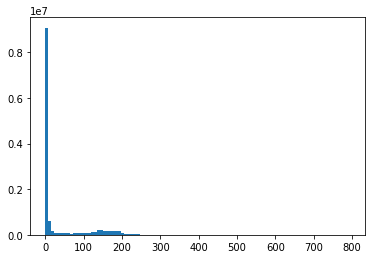

In [24]:
# Here you might try plt.hist or something else to find a threshold
data_1d = data.ravel()
plt.hist(data_1d, bins=100)

Try making a binarized image with your threshold and displaying slices with that. What structures are you picking up?

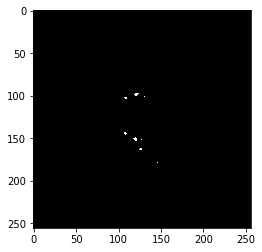

In [34]:
# Maybe display some slices from the data binarized with a threshold
threshold = 300
binarized_data = data > threshold
plt.imshow(binarized_data[:, :, 30], cmap='gray')

Now try taking a 3D subvolume out of the middle of the image (the approximate middle in all three axes) to pick out a good subvolume of the image that still contains the big arteries.

In [37]:
# Create a smaller 3D subvolume from the image data that still contains the arteries
subvolume = data[90:-90, 90:-90, 10:130]

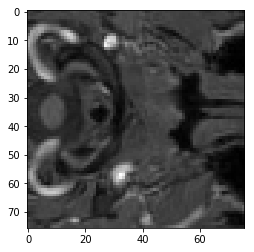

In [38]:
plt.imshow(subvolume[:, :, 30], cmap='gray')

Try binarizing that with some thresholds to see whether you can pick out the arteries without much other stuff. Hint - you might consider using np.percentile or plt.hist to find a good threshold.

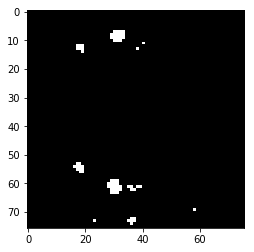

In [43]:
# Try a few plots of binarized slices and other stuff to find a good threshold
pct_99 = np.percentile(subvolume, 99)
binarized_subvolume = subvolume > pct_99
plt.imshow(binarized_subvolume[:, :, 20], cmap='gray')

If you have a good threshold and a good binarized subset, see if you can see the arterial structure using the fancy function to plot the binarized image with a 3D rendering.

In [44]:
# This function uses matplotlib 3D plotting and sckit-image for rendering
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

def binarized_surface(binary_array):
    """ Do a 3D plot of the surfaces in a binarized image
    
    This uses scikit-image and some fancy commands that we don't
    need to worry about at the moment, to do the plot.
    """
    verts, faces = measure.marching_cubes(binary_array, 0)
    fig = plt.figure(figsize=(10, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], linewidths=0, alpha=0.5)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, binary_array.shape[0])
    ax.set_ylim(0, binary_array.shape[1])
    ax.set_zlim(0, binary_array.shape[2])

For example, let's say you have a binarized subvolume of the original data called ``binarized_subvolume``.  You could do a 3D rendering of this binary image with:

`binarized_surface(binarized_subvolume)`

In [45]:
binarized_surface(binarized_subvolume)

/home/sara/anaconda3/lib/python3.6/site-packages/skimage/measure/_marching_cubes_lewiner.py:167: skimage_deprecation: `marching_cubes` now uses a better and faster algorithm, and returns four instead of two outputs (see docstring for details). Backwards compatibility with 0.12 and prior is available with `marching_cubes_classic`. This function will be removed in 0.14, consider switching to `marching_cubes_lewiner`.
  warn(skimage_deprecation('`marching_cubes` now uses a better and '


ValueError: too many values to unpack (expected 2)